<a href="https://colab.research.google.com/github/fmarquezf/MetNumUN2021I/blob/main/Lab12/fmarquezAlgorithmicToolboxWeek5InterpolationApproximationModelingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
# ... ENTER YOUR CODE HERE

In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


In [4]:
def design_matrix(x, m):
  x = np.array(x)
  A = []
  for k in range(m+1):
      A.append(x**k)
      
  return np.array(A).T

In [5]:
def normal_eq_solution(A,b):
    x = np.dot(np.linalg.inv(A.T @ A) @ A.T, b)
    res = np.linalg.norm(A @ x - b)
    return x, res

In [6]:
ms = range(1,10)
coef = [normal_eq_solution(design_matrix(x,m), y) for m in ms]

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [7]:
# ... ENTER YOUR CODE HERE ...

In [8]:
for a in coef:
    print(a[1]/(16 - len(a[0])))

0.5638018817879079
0.43442508405930796
0.03223727022631271
0.033656564378641424
0.03549656220020561
0.03588688045729663
0.03919349715902612
0.04065424160745155
0.04642385374992531


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

In [9]:
# ... ENTER YOUR CODE HERE

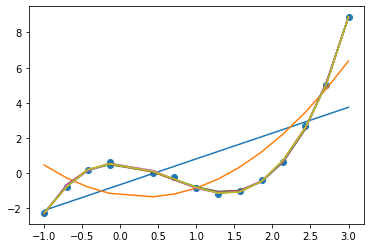

In [10]:
import numpy.polynomial.polynomial as pm
import matplotlib.pyplot as plt
plt.scatter(x,y)

for pol in coef:
    pl = pm.polyval(x,pol[0])
    plt.plot(x,pl)

plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [11]:
# ... ENTER YOUR CODE HERE ...

In [12]:
import numpy as np
import matplotlib.pyplot as plt

 mx + b
 
1.465 x - 0.648


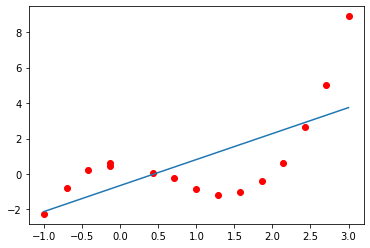

In [13]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

#Pasamos los datos a Array de Numpy
X, Y = np.array(x), np.array(y)

#Creamos la matriz de coeficientes
Xlen = len(X)
unos = np.ones(Xlen)
A = np.c_[unos, X]

#Usando descompision QR
q,r = np.linalg.qr(A)
qt = np.transpose(q)
qty = qt @ Y

#Solucionando
s = np.linalg.solve(r, qty)

#Nos da como solucion s = [b, a]
p = np.poly1d([s[1], s[0]])

print(" mx + b")
print(p)

#Imprimimos
plt.plot(X, Y, "or")
x_plot = np.linspace(-1,3,100)
plt.plot(x_plot, p(x_plot))
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

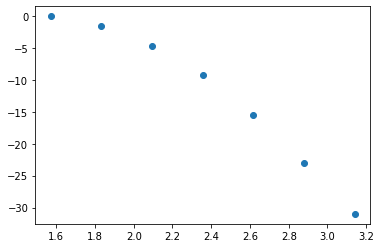

In [14]:
# ... ENTER YOUR CODE HERE ...

import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt

#Creacion de puntos
xi = np.array([((np.pi)/2),((105*np.pi)/180),((2*np.pi)/3),((3*np.pi)/4),((5*np.pi)/6),((165*np.pi)/180),(np.pi)])
z = []
for i in xi:
  z.append((i**2) * math.cos(i) * i)
yi = np.array(z)
plt.plot(xi, yi, 'o')

In [15]:
def lagr_interpol (m, xi, yi):
  n = m
  x = sym.Symbol('x')
  i = 0
  polinomio = 0

  #Terminos de Lagrange
  for i in range(0,n,1):
    numerador = 1
    denominador = 1
    for j in range(0,n,1):
      if i != j:
        numerador *= x-xi[j]
        denominador *= xi[i]-xi[j]
      termino = (numerador/denominador)*yi[i]
    polinomio += termino
  polisimple = sym.expand(polinomio)

  print(polinomio)
  print(polisimple)

  px = sym.lambdify(x,polinomio)
  p_xi = np.linspace(np.max(xi), np.min(xi), 100)
  pfi = px(p_xi)
  return p_xi, pfi

2.3732335931253993e-16
2.37323359312540e-16


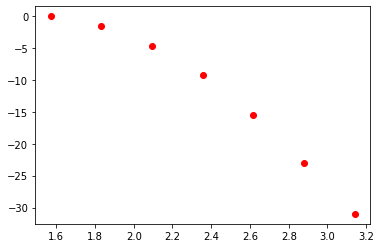

In [16]:
#With m = 1
n = 1
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 1)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

9.55756985571131 - 6.08453794593019*x
9.55756985571131 - 6.08453794593019*x


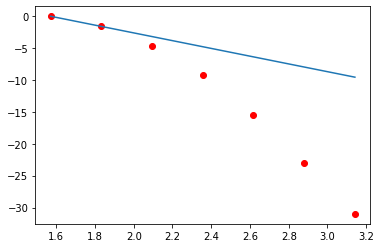

In [17]:
#with m = 2

p_xi, pfi = lagr_interpol(2, xi, yi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

1.73130362434961e-15*(x - 2.0943951023932)*(x - 1.83259571459405) + 23.2412229726*(x - 2.0943951023932)*(x - 1.5707963267949) - 33.5103216382911*(x - 1.83259571459405)*(x - 1.5707963267949)
-10.2690986656912*x**2 + 28.865230725121*x - 20.0034130485756


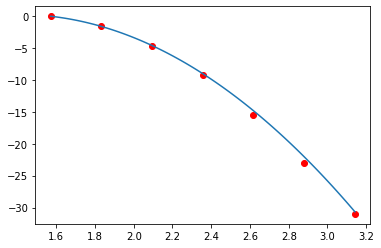

In [18]:
#with m = 3

p_xi_3, pfi_3 = lagr_interpol(3, xi, yi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi_3, pfi_3)
plt.show()

-2.20436423846524e-15*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405) - 44.3874662350824*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.5707963267949) + 128.0*(x - 2.35619449019234)*(x - 1.83259571459405)*(x - 1.5707963267949) - 85.9134739141655*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949)
-2.30094014924784*x**3 + 2.38098050545574*x**2 + 5.84045379835527*x - 6.13104893061131


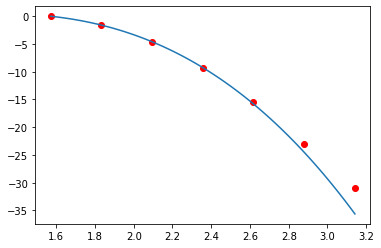

In [19]:
#with m = 4

p_xi, pfi = lagr_interpol(4, xi, yi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

2.10501278956046e-15*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405) + 56.5158773011037*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.5707963267949) - 244.461992589151*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 1.83259571459405)*(x - 1.5707963267949) + 328.165297239265*(x - 2.61799387799149)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) - 137.832223855448*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949)
2.3869580957695*x**4 - 21.0480651944877*x**3 + 57.1868226069801*x**2 - 64.8294693404332*x + 27.776866259308


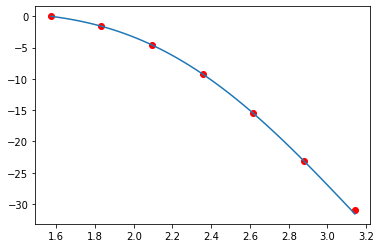

In [20]:
#with m = 5

p_xi, pfi = lagr_interpol(5, xi, yi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

1.02375545961852e-15*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405) + 41.2290401956773*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.5707963267949) - 297.230141336366*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 1.83259571459405)*(x - 1.5707963267949) + 798.002312318926*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) - 1005.50333268646*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) + 597.083001866827*(x - 3.14159265358979)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) - 133.753563601365*(x - 2.87979326579064)*(x - 2.61799387799149)*(

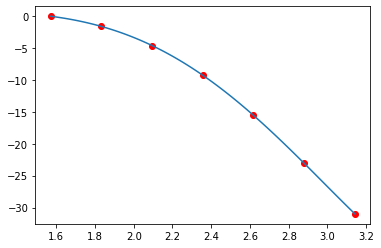

In [21]:
#with m = len(xi)

p_xi, pfi = lagr_interpol(len(xi), xi, yi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

-4.43385378114682*(x - 3.0983619403176)*(x - 2.06556314867247) + 16.0851715665763*(x - 3.0983619403176)*(x - 1.81367431588095) - 22.3963494012896*(x - 2.06556314867247)*(x - 1.81367431588095)
-10.7450316158602*x**2 + 30.7659005258923*x - 21.8892488128102


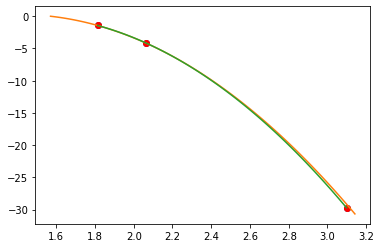

In [22]:
def chebishev_nodes(a,b,m):
  k = np.array(range(m))
  x = np.cos(2*k+1/m)
  return (x+1)*(b-a)/2 + a

grid = chebishev_nodes(np.pi/2, np.pi, 3)

z = []
for i in grid:
  z.append((i**2) * math.cos(i) * i)
yi = np.array(z)
plt.plot(grid, yi, 'o')

n = len(grid)
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-grid[j]
      denominador *= grid[i]-grid[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(grid), np.min(grid), 100)
pfi = px(p_xi)

plt.plot(grid, yi, 'or')
plt.plot(p_xi_3, pfi_3)
plt.plot(p_xi, pfi)
plt.show()
